In [48]:
import numpy as np
import pandas as pd

### Read CSV File and convert date into week day

In [49]:
#read file
file="daily.csv"
df = pd.read_csv(file, sep=',')

# convert date 
from datetime import datetime
date_format = "%Y-%m-%d"
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Day_of_week'] = df['Date'].dt.dayofweek

#print first 5
df.head()

,Date,Do,Start_Time,End _Time,Spend_Time,Week,Day_of_week
0,2020-01-05,Wake,8:45 AM,8:45 AM,0.0,1.0,6
1,2020-01-05,Buy Grocery,9:15 AM,11:15 AM,2.0,1.0,6
2,2020-01-05,Study,11:30 AM,5:00 PM,5.5,1.0,6
3,2020-01-05,Eat,5:00 PM,6:30 PM,1.5,1.0,6
4,2020-01-05,Friends,6:30 PM,12:00 AM,5.5,1.0,6


### Descriptions of Data

In [50]:
# std, mean, count
df.describe(include="all")

,Date,Do,Start_Time,End _Time,Spend_Time,Week,Day_of_week
count,151,151,151,150,150.000000,150.000000,151.000000
unique,15,19,50,50,NaN,NaN,NaN
top,2020-01-06 00:00:00,Study,12:00 PM,12:00 AM,NaN,NaN,NaN
freq,14,25,13,14,NaN,NaN,NaN
first,2020-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-01-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.156667,1.546667,3.039735
std,NaN,NaN,NaN,NaN,2.557485,0.562672,2.055499
min,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000


#### Group same date and same thing at that day
    for this part, we can group by date and the thing I do.  

In [51]:
d=df.groupby(["Date","Do"]).sum().reset_index().sort_values("Date", ascending=True)
d.head()

,Date,Do,Spend_Time,Week,Day_of_week
0,2020-01-05,Buy Grocery,2.0,1.0,6
1,2020-01-05,Eat,1.5,1.0,6
2,2020-01-05,Friends,5.5,1.0,6
3,2020-01-05,Study,5.5,1.0,6
4,2020-01-05,Wake,0.0,1.0,6


### Compare each Do category total and each week! 
    
    I want to discover each Do category spend time situation.

In [52]:
Summy=(df.groupby("Do").sum()).sort_values("Spend_Time", ascending=True)
Summy

Week1=df.loc[df['Week'] == 1]

Summy_week1=(Week1.groupby("Do").sum()).sort_values("Spend_Time", ascending=True)
Summy_week1


Week2=df.loc[df['Week'] == 2]

Summy_week2=(Week2.groupby("Do").sum()).sort_values("Spend_Time", ascending=True)
Summy_week2

st='Spend_Time'
Week=pd.concat([Summy[st],Summy_week1[st],Summy_week2[st]],axis=1)
Week

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


,Spend_Time,Spend_Time,Spend_Time
Bath,1.00,0.50,0.50
Breakfast,4.00,4.00,NaN
Buy Grocery,4.50,3.00,1.50
Class,17.50,10.50,7.00
Eat,28.75,14.00,14.75
Friend,7.00,NaN,7.00
Friends,9.50,9.50,NaN
Housing,1.00,1.00,NaN
Movie,13.50,5.50,8.00
Music,19.00,7.25,11.75


### Data Visualization

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
#plot in notebook

#### Plot the Do category  by Date

totoal Eat time for week: 28.75
totoal study time for week: 48.0
totoal Youtube time for week: 23.5
totoal Music time for week: 19.0


Text(0, 0.5, 'Music time')

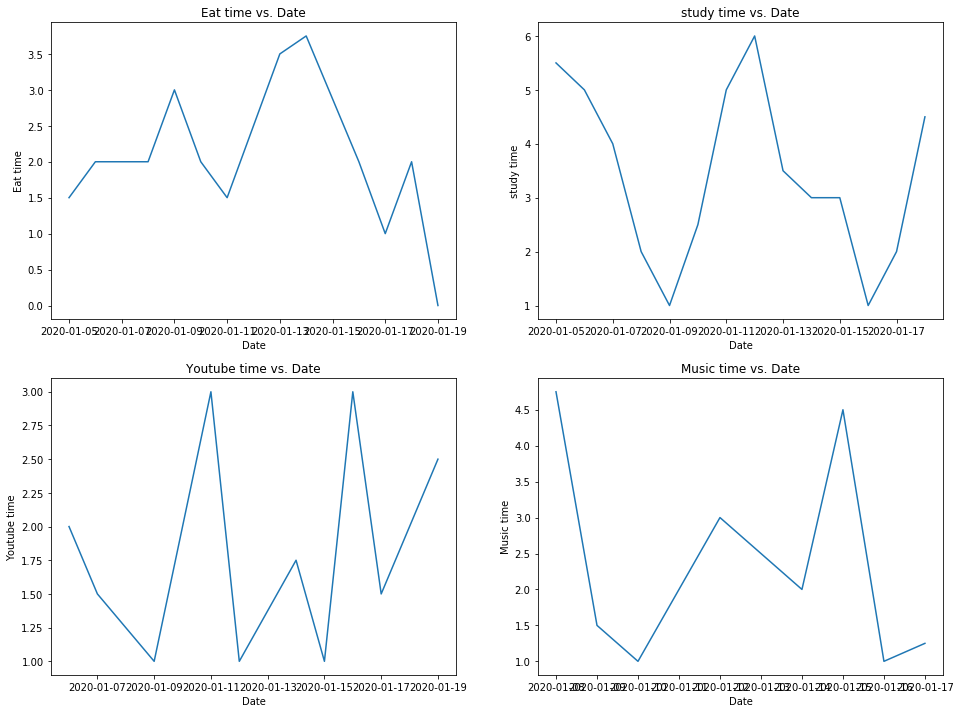

In [54]:
fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(2,2,1)

Eat = d["Do"]=="Eat"
ax1.plot(d[Eat]["Date"], d[Eat]["Spend_Time"])
Eat_sum = d[Eat]["Spend_Time"].sum()
print("totoal Eat time for week: {}".format(Eat_sum))
ax1.set_title("Eat time vs. Date")
# Add some axis labels.
ax1.set_xlabel("Date")
ax1.set_ylabel("Eat time")


ax2 = fig.add_subplot(2,2,2)

Study = d["Do"]=="Study"
ax2.plot(d[Study]["Date"], d[Study]["Spend_Time"])
study_sum = d[Study]["Spend_Time"].sum()
print("totoal study time for week: {}".format(study_sum))
ax2.set_title("study time vs. Date")
# Add some axis labels.
ax2.set_xlabel("Date")
ax2.set_ylabel("study time")

ax3 = fig.add_subplot(2,2,3)
Youtube = d["Do"]=="Youtube"
ax3.plot(d[Youtube]["Date"], d[Youtube]["Spend_Time"])
Youtube_sum = d[Youtube]["Spend_Time"].sum()
print("totoal Youtube time for week: {}".format(Youtube_sum))
ax3.set_title("Youtube time vs. Date")
# Add some axis labels.
ax3.set_xlabel("Date")
ax3.set_ylabel("Youtube time")

ax3 = fig.add_subplot(2,2,4)
Music = d["Do"]=="Music"
ax3.plot(d[Music]["Date"], d[Music]["Spend_Time"])
Music_sum = d[Music]["Spend_Time"].sum()
print("totoal Music time for week: {}".format(Music_sum))
ax3.set_title("Music time vs. Date")
# Add some axis labels.
ax3.set_xlabel("Date")
ax3.set_ylabel("Music time")

#### Plot the Do category by Week

In [55]:
fig = plt.figure(figsize=(12, 8))
dd=df[["Do","Spend_Time","Day_of_week"]]
DD=dd.groupby(["Day_of_week","Do"])["Spend_Time"].sum().reset_index()
DD

,Day_of_week,Do,Spend_Time
0,0,Breakfast,1.0
1,0,Class,7.0
2,0,Eat,5.5
3,0,Friends,1.0
4,0,Parent,1.5
...,...,...,...
69,6,Sleep,17.5
70,6,Study,11.5
71,6,Wake,0.0
72,6,Work,0.5


<Figure size 864x576 with 0 Axes>

totoal Eat time for week: 28.75
totoal study time for week: 48.0
totoal Youtube time for week: 23.5
totoal Music time for week: 19.0
totoal Class time for week: 17.5


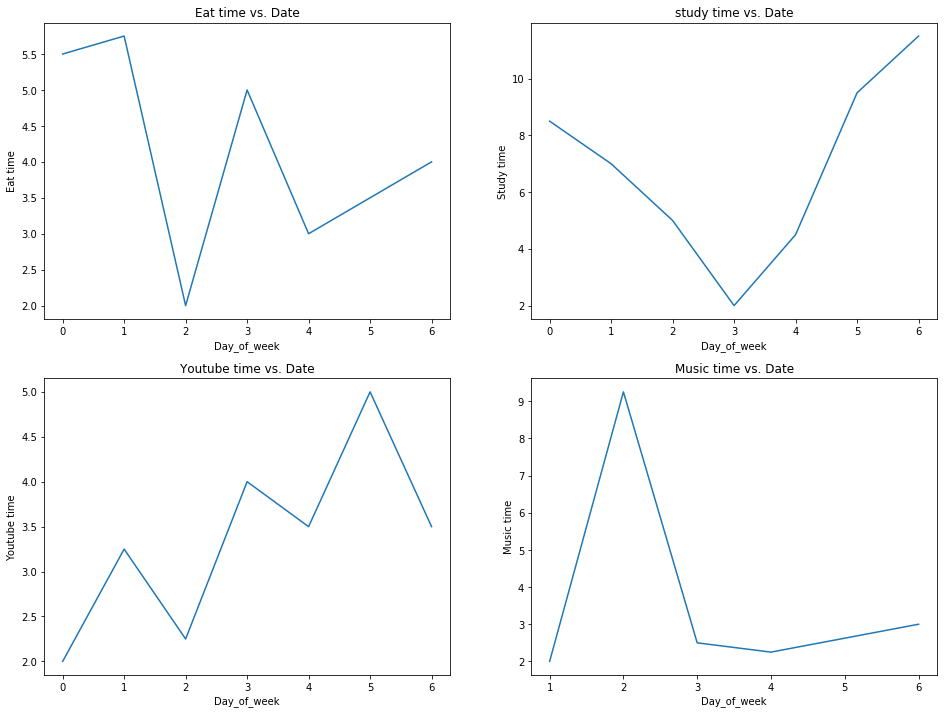

In [56]:
fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(2,2,1)

Eat = DD["Do"]=="Eat"
ax1.plot(DD[Eat]["Day_of_week"], DD[Eat]["Spend_Time"])
Eat_sum = DD[Eat]["Spend_Time"].sum()
print("totoal Eat time for week: {}".format(Eat_sum))
ax1.set_title("Eat time vs. Date")
# Add some axis labels.
ax1.set_xlabel("Day_of_week")
ax1.set_ylabel("Eat time")


ax2 = fig.add_subplot(2,2,2)

Study = DD["Do"]=="Study"
ax2.plot(DD[Study]["Day_of_week"], DD[Study]["Spend_Time"])
study_sum = DD[Study]["Spend_Time"].sum()
print("totoal study time for week: {}".format(study_sum))
ax2.set_title("study time vs. Date")
# Add some axis labels.
ax2.set_xlabel("Day_of_week")
ax2.set_ylabel("Study time")

ax3 = fig.add_subplot(2,2,3)
Youtube = DD["Do"]=="Youtube"
ax3.plot(DD[Youtube]["Day_of_week"], DD[Youtube]["Spend_Time"])
Youtube_sum = DD[Youtube]["Spend_Time"].sum()
print("totoal Youtube time for week: {}".format(Youtube_sum))
ax3.set_title("Youtube time vs. Date")
# Add some axis labels.
ax3.set_xlabel("Day_of_week")
ax3.set_ylabel("Youtube time")

ax3 = fig.add_subplot(2,2,4)
Music = DD["Do"]=="Music"
ax3.plot(DD[Music]["Day_of_week"], DD[Music]["Spend_Time"])
Music_sum = DD[Music]["Spend_Time"].sum()
print("totoal Music time for week: {}".format(Music_sum))
ax3.set_title("Music time vs. Date")
# Add some axis labels.
ax3.set_xlabel("Day_of_week")
ax3.set_ylabel("Music time")

Class = DD["Do"]=="Class"
Class_sum = DD[Class]["Spend_Time"].sum()
print("totoal Class time for week: {}".format(Class_sum))

Text(0.5, 1.0, 'Spend Time v. Do')

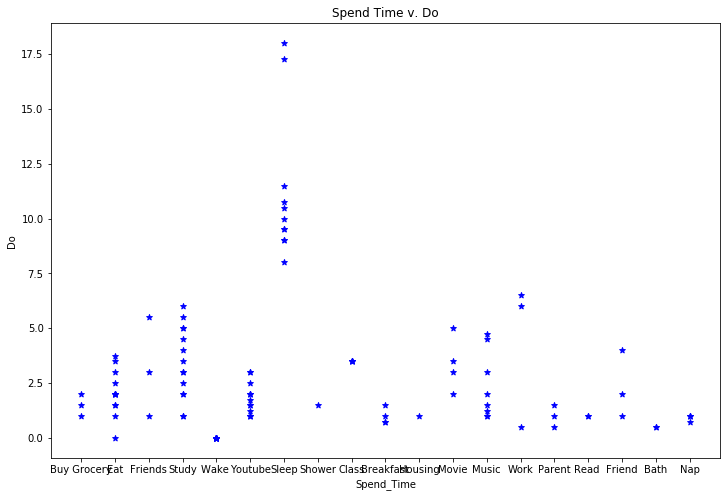

In [57]:
fig = plt.figure(figsize=(12, 8))

plt.scatter(d["Do"],d["Spend_Time"], color="blue", marker="*")
plt.xlabel('Spend_Time')
plt.ylabel('Do')
plt.title('Spend Time v. Do')

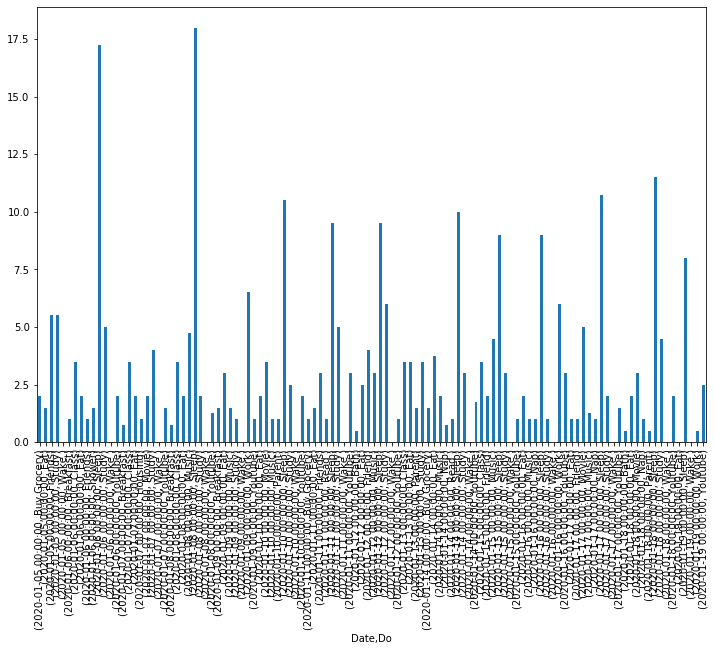

In [58]:
fig = plt.figure(figsize=(12, 8))
gg=d.groupby(["Date","Do"])["Spend_Time"].sum()
plt.show(gg.plot(kind="bar"))

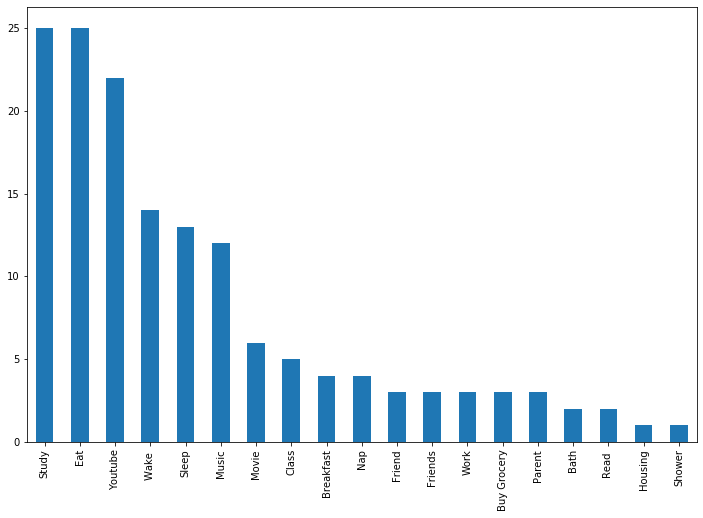

In [59]:
fig = plt.figure(figsize=(12, 8))
df["Do"].value_counts().plot(kind='bar')